In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('./data/salary.csv') #load the salary dataset into your jupyter notebook
df.head() # Take a short look into the loaded data. 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Drop education and fnlwgt column
df = df.drop(columns=['education', 'fnlwgt'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education-num   32561 non-null  int64 
 3   marital-status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   capital-gain    32561 non-null  int64 
 9   capital-loss    32561 non-null  int64 
 10  hours-per-week  32561 non-null  int64 
 11  native-country  32561 non-null  object
 12  salary          32561 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


In [4]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #Initalization as shortcut 'le'

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = le.fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = le.fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)


In [5]:
# Label Encode multiple columns
df2 = MultiColumnLabelEncoder(columns = ['workclass','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'salary' ]).fit_transform(df)

# Show the first five columns 
df2.head(5)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,13,2,4,0,4,1,0,0,13,39,0
2,38,4,9,0,6,1,4,1,0,0,40,39,0
3,53,4,7,2,6,0,2,1,0,0,40,39,0
4,28,4,13,2,10,5,2,0,0,0,40,5,0


In [6]:
from sklearn.preprocessing import MinMaxScaler


min_max = MinMaxScaler()
df_scaled = min_max.fit_transform(df2)
column_headers = ['age', 'workclass', 'education_num', 'marital_status', 'occupation', 'relationship', 'race','sex','capital-gain', 'capital-loss', 'hours-per-week', 'native_country', 'salary']
df_scaled = pd.DataFrame(df_scaled, columns=column_headers)
df_scaled

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native_country,salary
0,0.301370,0.875,0.800000,0.666667,0.071429,0.2,1.0,1.0,0.021740,0.0,0.397959,0.951220,0.0
1,0.452055,0.750,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.000000,0.0,0.122449,0.951220,0.0
2,0.287671,0.500,0.533333,0.000000,0.428571,0.2,1.0,1.0,0.000000,0.0,0.397959,0.951220,0.0
3,0.493151,0.500,0.400000,0.333333,0.428571,0.0,0.5,1.0,0.000000,0.0,0.397959,0.951220,0.0
4,0.150685,0.500,0.800000,0.333333,0.714286,1.0,0.5,0.0,0.000000,0.0,0.397959,0.121951,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.500,0.733333,0.333333,0.928571,1.0,1.0,0.0,0.000000,0.0,0.377551,0.951220,0.0
32557,0.315068,0.500,0.533333,0.333333,0.500000,0.0,1.0,1.0,0.000000,0.0,0.397959,0.951220,1.0
32558,0.561644,0.500,0.533333,1.000000,0.071429,0.8,1.0,0.0,0.000000,0.0,0.397959,0.951220,0.0
32559,0.068493,0.500,0.533333,0.666667,0.071429,0.6,1.0,1.0,0.000000,0.0,0.193878,0.951220,0.0


## 2. Modeling

### 2.1 Setting the target variable 

In [7]:
# Setting the target variable 

X = df_scaled.iloc[:, :-1] # as input variables
y = df_scaled.iloc[:, -1] # as target variable (label)


In [8]:
X.head(5) # short look into the data of subset X (training data)

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native_country
0,0.301370,0.875,0.800000,0.666667,0.071429,0.2,1.0,1.0,0.02174,0.0,0.397959,0.951220
1,0.452055,0.750,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.00000,0.0,0.122449,0.951220
2,0.287671,0.500,0.533333,0.000000,0.428571,0.2,1.0,1.0,0.00000,0.0,0.397959,0.951220
3,0.493151,0.500,0.400000,0.333333,0.428571,0.0,0.5,1.0,0.00000,0.0,0.397959,0.951220
4,0.150685,0.500,0.800000,0.333333,0.714286,1.0,0.5,0.0,0.00000,0.0,0.397959,0.121951


In [9]:
y.head(5) # short look into the data of subset y (test data)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: salary, dtype: float64

### 2.2 Splitting the data into training and testing data

In this example, we split the dataset into 70% training data and 30% test data. 

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [11]:
# what dimensions does X_train (training data) and X_test (test data) have?

training_data = X_train.shape
print(f'The shape of training dataset is {training_data}')
test_data = X_test.shape
print(f'The shape of test dataset is {test_data}')

The shape of training dataset is (22792, 12)
The shape of test dataset is (9769, 12)


In [12]:
# check the distribution of the test dataset

y_test.value_counts()

0.0    7417
1.0    2352
Name: salary, dtype: int64

### 2.3 SVM Model

Now we will model a Support Vector machine and apply it to our data. 

In [13]:
# Initialize the SVM function and apply it on our training set. 
# After the training we test the generalization ability on our test set.

from sklearn.svm import SVC
from sklearn import metrics

svm = SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8435868563824342


In [14]:
# What are the support vectors?

svm.support_vectors_

array([[0.15068493, 0.5       , 0.6       , ..., 0.        , 0.39795918,
        0.95121951],
       [0.38356164, 0.5       , 0.53333333, ..., 0.        , 0.39795918,
        0.95121951],
       [0.24657534, 0.5       , 0.6       , ..., 0.        , 0.39795918,
        0.95121951],
       ...,
       [0.24657534, 0.5       , 0.8       , ..., 0.        , 0.52040816,
        0.95121951],
       [0.65753425, 0.        , 0.53333333, ..., 0.        , 0.39795918,
        0.95121951],
       [0.36986301, 0.75      , 0.53333333, ..., 0.        , 0.39795918,
        0.53658537]])

### 2.4 Evaluation


In [15]:
# Check if the model overfits 
print("train accuracy:",svm.score(X_train,y_train))
print("test accuracy:",svm.score(X_test,y_test))

train accuracy: 0.8488065988065988
test accuracy: 0.8435868563824342


The accuracy scores of the training and test dataset are quite comparable. So, there is no question of overfitting.


True Positives(TP) =  7014

True Negatives(TN) =  1227

False Positives(FP) =  403

False Negatives(FN) =  1125


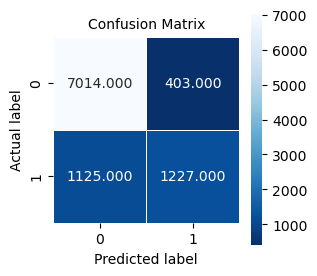

In [16]:
# print out the confusion matrix

from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 10);

print('\nTrue Positives(TP) = ', confusion_matrix[0,0])

print('\nTrue Negatives(TN) = ', confusion_matrix[1,1])

print('\nFalse Positives(FP) = ', confusion_matrix[0,1])

print('\nFalse Negatives(FN) = ', confusion_matrix[1,0])

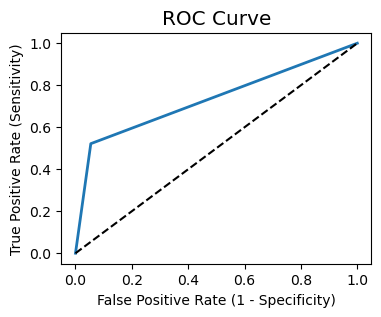

In [17]:
# print the roc curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(4,3))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC Curve')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [18]:
# what is the ROC-area under the curve? 

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7337


### 2.5 Hyperparameter Tuning with GridSearchCV

In [19]:
# what are the best parameters for the model? 
# take care that the parameters to be optimised change depending from the kernel-type (see slides)

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=SVC(),param_grid={'C': [1, 10],'gamma': [0.1, 0.9], 
                                                       'kernel': ('linear', 'rbf','sigmoid', 'poly')})
grid_search.fit(X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'gamma': [0.1, 0.9],
                         'kernel': ('linear', 'rbf', 'sigmoid', 'poly')})

In [20]:
# print out best possible parameters

print("best parameter: ", grid_search.best_params_)

best parameter:  {'C': 10, 'gamma': 0.9, 'kernel': 'rbf'}


In [23]:
from sklearn.model_selection import cross_val_score

C_range=list(range(1,26))
acc_score=[]

for c in C_range:
    svc = SVC(kernel='poly', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score) 

[0.8468415882178547, 0.847977885846323, 0.8476092883292761, 0.8472407191013271, 0.847179322329, 0.8473328566934646, 0.8476707039610017, 0.8477628415531393, 0.8477935446541526, 0.8481313919216898, 0.8481621044524023, 0.8481006982503759, 0.8481314107810884, 0.8481314107810884, 0.848070004579062, 0.848069976289964, 0.8481006888206766, 0.848070004579062, 0.8482235483732261, 0.8481928264128141, 0.8480699857196633, 0.8481621233118011, 0.8479778575572251, 0.8479471450265127, 0.848069976289964]


Text(0, 0.5, 'Cross-Validated Accuracy')

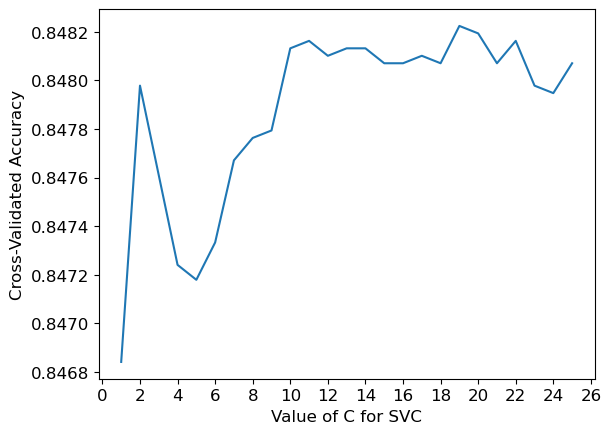

In [24]:
#visualize optimisation iteration

import matplotlib.pyplot as plt
%matplotlib inline


C_values=list(range(1,26))
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [25]:
# print out the best score

print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

GridSearch CV best score : 0.8481




In [26]:
# Modeling SVM with the optimal parameters 

best_svm_model = SVC(kernel='poly', gamma = 0.9, C=10.0) 


# fit classifier to training set
best_svm_model.fit(X_train, y_train)


# make predictions on test set
y1_pred=best_svm_model.predict(X_test)


In [27]:
# what are the support vectors for the optimized model?

best_svm_model.n_support_

array([3940, 3849])

In [28]:
print("train accuracy before:",svm.score(X_train,y_train))
print("test accuracy before:",svm.score(X_test,y_test))


print("train accuracy after :",best_svm_model.score(X_train,y_train))
print("test accuracy after:",best_svm_model.score(X_test,y_test))

train accuracy before: 0.8488065988065988
test accuracy before: 0.8435868563824342
train accuracy after : 0.8521849771849772
test accuracy after: 0.8446105026102979


In [29]:
# what is the ROC-area under the curve of the optimized model? 

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC before: {:.4f}'.format(ROC_AUC))

ROC_AUC1 = roc_auc_score(y_test, y1_pred)

print('ROC AUC after: {:.4f}'.format(ROC_AUC1))

ROC AUC before: 0.7337
ROC AUC after: 0.7402


### 2.6 Cross Validation

In [30]:
# Compute the cross validation scores for the model with default settings (svm) and our optimized model (best_svm_model)

from sklearn.model_selection import cross_val_score

# cross validation for model with default settings (svm)
scores = cross_val_score(estimator = svm, X = X_train, y = y_train, cv = 10, n_jobs = 1)
print('Cross validation scores for model svm: %s' % scores)

# cross validation for optimized model (best_svm_model)
scores1 = cross_val_score(estimator = best_svm_model, X = X_train, y = y_train, cv = 10, n_jobs = 1)
print('Cross validation scores for model best_svm_model: %s' % scores1)

Cross validation scores for model svm: [0.85833333 0.84035088 0.85827117 0.82974989 0.84730145 0.84686266
 0.85388328 0.84774024 0.84071961 0.84466871]
Cross validation scores for model best_svm_model: [0.85701754 0.83947368 0.86222027 0.83062747 0.84686266 0.85256692
 0.85739359 0.84861781 0.84071961 0.84730145]


In [31]:
# print the cross validated ROC-AUC for the optimized model (best_svm_model)

# cross validation for optimized model (best_svm_model)
Cross_validated_ROC_AUC1 = cross_val_score(best_svm_model, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC1))

Cross validated ROC AUC : 0.8937


In [32]:
# Perform a k-fold cross-validation 

from sklearn.model_selection import KFold


kfold=KFold(n_splits=5, shuffle=True, random_state=0)



svm_scores = cross_val_score(best_svm_model, X, y, cv=kfold)

print('k-fold cross-validation scores:\n\n{}'.format(svm_scores))

k-fold cross-validation scores:

[0.84538615 0.85534398 0.84628378 0.84290541 0.84674447]
